Libaries /Module we are using
    Agent-Langraph,langchain
    Speech2Text-
    Text2Speech-

Workflow-4 Agent 2 tools
    One agnet will recognise the speech ,second will think about the response,third one will evaluate the response if response is correct it will turn back to second one and fourth one will give the reply by using tts
 

In [1]:
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
from langgraph.prebuilt import ToolNode, tools_condition
import requests
import os
from langgraph.checkpoint.memory import MemorySaver
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import Annotated
from typing_extensions import TypedDict
import gradio as gr

d:\SmartCane\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv(override=True)

True

In [3]:
api_key=os.getenv("GOOGLE_API_KEY")
if(api_key):
    print("key loaded")

key loaded


In [4]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-pro",
    temperature=1.0,
    max_retries=2,
    google_api_key=api_key,
)

In [5]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [ ]:
# def query_taker(old_state) -> State:
#     system_messages = """You are an assistant responsible for receiving and understanding user queries.
#     Your task is to accurately capture the user's intent and prepare the query for processing. """
    

#     # Support both dict or State object for input parameter
#     if isinstance(old_state, dict):
#         messages = [system_messages] + old_state.get("messages", [])
#     else:
#         messages = [system_messages] + old_state.messages

#     take_ques = llm.invoke(messages)
#     new_state = State(messages=[take_ques])
#     return new_state


In [ ]:
# graph_builder.add_node("querytaker",query_taker)


In [6]:
def voicebot(state) -> State:
    system_message = """   
    You are the VoiceBot agent of the system.
    - Your role is to answer the user's  queries clearly and helpfully.
    - To understand the user's question, use the output provided by the query_taker node.
    - Keep responses short, friendly, and safety-oriented.
    """
    
    if isinstance(state, dict):
        messages = [system_message] + state.get("messages", [])
    else:
        messages = [system_message] + state.messages
    
    bot_reply = llm.invoke(messages)
    new_state = State(messages=[bot_reply])
    return new_state


In [7]:
graph_builder.add_node("voice",voicebot)

In [8]:
graph_builder.add_edge(START,"voice")

In [ ]:
# graph_builder.add_edge("querytaker","voice")

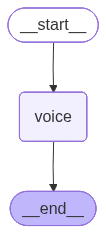

In [9]:
memory=MemorySaver()
graph=graph_builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "10"}}
async def chat(user_input: str, history):
    result = await graph.ainvoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content


gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
